## Welcome to Detective Agency

In [ ]:
from src.DigitalTwin import City, Detective,  Agency

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
config_RM = dict(
    murder=dict(price=2000, avg_time=2, success_rate=0.5),
    theft=dict(price=500, avg_time=3, success_rate=0.7),
    adultery=dict(price=800, avg_time=1, success_rate=0.5),
)

config_SH = dict(
    murder=dict(price=2000, avg_time=10, success_rate=0.5),
    theft=dict(price=500, avg_time=10, success_rate=0.5),
    adultery=dict(price=800, avg_time=10, success_rate=0.5),
)

Let's frist create the model to describe population in the city:

In [3]:
town=City(population=100000, average_age=30)

Drawing N guys from population fo the city who have some problems

In [4]:
clients=town.get_people(1000)

Now lets create an Angecy

In [5]:
BusyWeed=Agency([Detective(config=config_SH, name='SH'), Detective(config=config_RM, name='RM')])

And assign cases to detectives

In [6]:
BusyWeed.get_cases(clients)

Now actully solve the cases

In [7]:
BusyWeed.process_cases()

Checking initial distributions in populations

In [13]:
df.sort_index()

,status,init_date,finish_date,time_spent,detective_id,revenue,case_type
0,1,2024-02-24 15:58:00.290152,2024-03-05 12:02:20.469695,9 days 20:04:20.179543,0,500,theft
1,1,2006-05-01 03:53:45.430467,2006-05-12 04:35:09.420961,11 days 00:41:23.990494,0,2000,murder
2,1,2015-03-27 14:59:38.390895,2015-03-29 09:10:04.716242,1 days 18:10:26.325347,1,2000,murder
3,0,2005-12-02 13:33:38.813638,2005-12-05 05:33:55.271309,2 days 16:00:16.457671,1,0,theft
4,0,2003-11-06 22:53:54.834389,2003-11-16 04:57:19.812481,9 days 06:03:24.978092,0,0,murder
...,...,...,...,...,...,...,...
995,1,2006-08-20 14:38:57.879622,2006-08-21 14:25:24.844702,0 days 23:46:26.965080,1,800,adultery
996,0,2025-07-04 15:31:48.640017,2025-07-06 17:04:29.441536,2 days 01:32:40.801519,1,0,murder
997,0,2004-06-05 21:48:49.292902,2004-06-06 23:22:57.070197,1 days 01:34:07.777295,1,0,adultery
998,1,2008-09-21 15:05:47.382060,2008-10-02 08:22:48.121491,10 days 17:17:00.739431,0,800,adultery


In [14]:
df['cat_status']=df['status'].apply(lambda x: 'solved' if x else 'unsolved')

<Axes: xlabel='cat_status', ylabel='Count'>

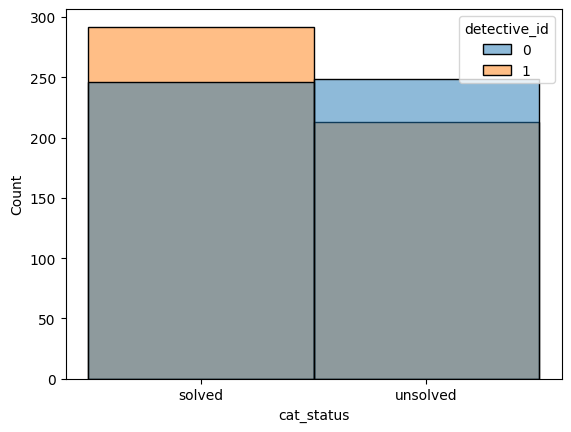

In [15]:
sns.histplot(data=df,x='cat_status', hue='detective_id')

Who is the most profitable detective:

In [34]:
rm = df[df.detective_id==0]
sh = df[df.detective_id==1]

In [35]:
rm_means=pd.Series([rm.sample(frac=1, replace=True)['revenue'].mean() for _ in range(10000)])
sh_means=pd.Series([sh.sample(frac=1, replace=True)['revenue'].mean() for _ in range(10000)])

In [36]:
effect=sh_means.mean()-rm_means.mean()
diffs= sh_means-rm_means-effect
p_value = np.mean(np.abs(diffs) >= np.abs(effect))

In [37]:
print(f"Observed effect: {effect}")
print(f"Bootstrap p-value: {p_value}")

Observed effect: 115.20849744974487
Bootstrap p-value: 0.0108


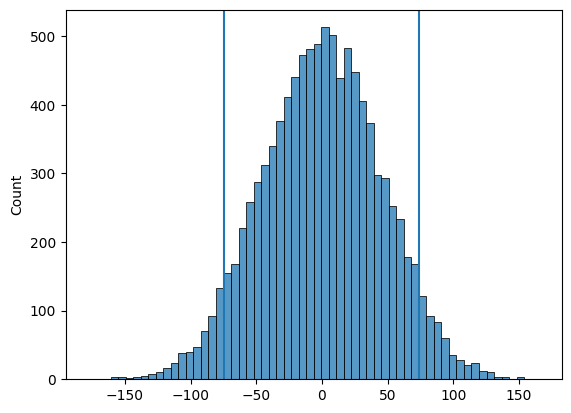

In [49]:
sns.histplot(diffs)

plt.axvline(diffs.quantile(0.05))
plt.axvline(diffs.quantile(0.95))

Standart errors

In [47]:
se=np.sqrt(sum([(x)**2 for x in diffs])/len(diffs))

In [69]:
zalpha=stats.norm.ppf(0.025)
zalpha

np.float64(-1.9599639845400545)

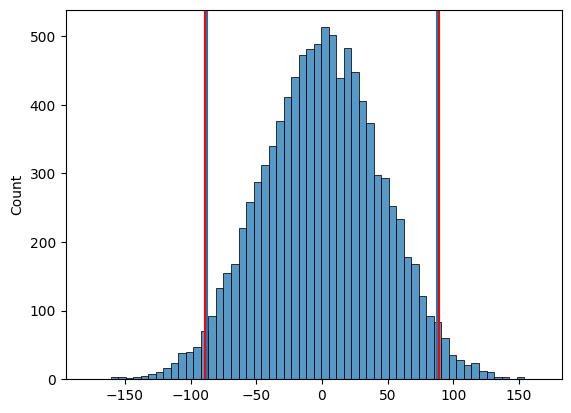

In [70]:
sns.histplot(diffs)

plt.axvline(diffs.quantile(0.025))
plt.axvline(diffs.quantile(0.975))
plt.axvline(se*1.96,color='r')
plt.axvline(-se*1.96,color='r')

Check for normality

In [53]:
from scipy.stats import shapiro

In [54]:
shapiro(diffs)

/opt/homebrew/Caskroom/mambaforge/base/envs/detective/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9998134842774046), pvalue=np.float64(0.5785199909120861))

In [ ]:
from scipy import stats

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943], shape=(10000,)),
  array([-178.01277788, -165.20749735, -158.20479708, ...,  153.18034143,
          154.04642804,  165.34955836], shape=(10000,))),
 (np.float64(45.46503140048722),
  np.float64(9.734662139624397e-14),
  np.float64(0.9999155992479127)))

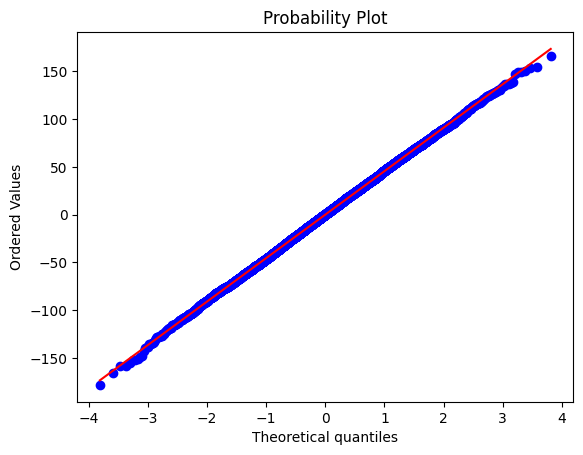

In [58]:
stats.probplot(diffs, dist='norm', plot=plt)

Total solved cases per detective

In [25]:
df.groupby(by='detective_id')['status'].agg('sum')

detective_id
0    33
1    21
Name: status, dtype: int64

Solved cases per year per detective

In [173]:
test=df.set_index('finish_date')
test['year']=test.index.to_period('Y')

In [210]:
solved_cases_1=test.groupby(by=['year','detective_id'])['status'].sum().unstack(-1).interpolate()[0]
solved_cases_2=test.groupby(by=['year','detective_id'])['status'].sum().unstack(-1).interpolate()[1]

<Axes: xlabel='year'>

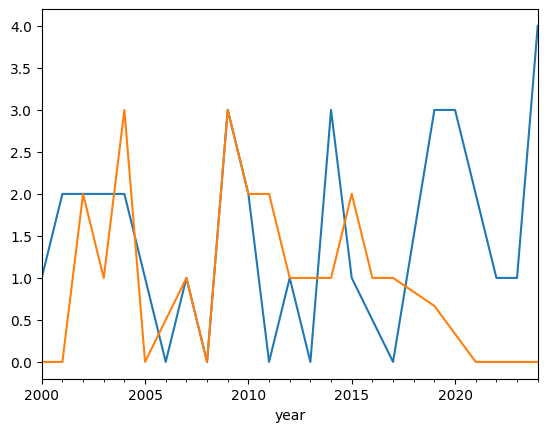

In [211]:
solved_cases_1.plot()
solved_cases_2.plot()

<Axes: xlabel='year'>

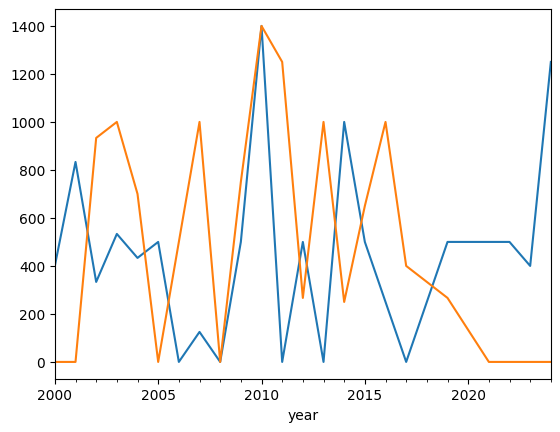

In [215]:
# from notes import rev


rev_1=test.groupby(by=['year','detective_id'])['revenue'].mean().unstack(-1).interpolate()[0]
rev_2=test.groupby(by=['year','detective_id'])['revenue'].mean().unstack(-1).interpolate()[1]
rev_1.plot()
rev_2.plot()

In [ ]:
rev_vs_cases=pd.DataFrame(rev_1).join(solved_cases_1)

Revenue per detective

In [78]:
df.groupby(by='detective_id')['revenue'].agg('sum')

detective_id
0    25800
1    27300
Name: revenue, dtype: int64

Revenue per month per detective

In [ ]:
rev=df.set_index('finish_date')

In [124]:
detective1=rev[rev['detective_id']==0]
detective2=rev[rev['detective_id']==1]

In [134]:
d1=detective1.groupby(pd.Grouper(freq='YE'))['revenue'].mean().interpolate()
d2=detective2.groupby(pd.Grouper(freq='YE'))['revenue'].mean().interpolate()

In [193]:
t=d1.index.map(lambda x: x.toordinal())
x1 = d1.index.map(lambda d: d.toordinal())
y1 = d1.values

x2 = d2.index.map(lambda d: d.toordinal())
y2 = d2.values


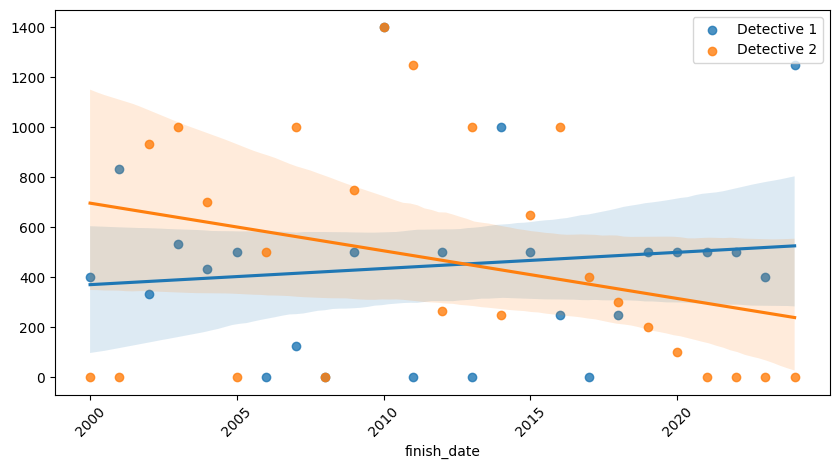

In [198]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot regression lines for both series on the same axis
sns.regplot(x=x1, y=y1, ax=ax, label='Detective 1')
sns.regplot(x=x2, y=y2, ax=ax, label='Detective 2')

# Set custom x-ticks with formatted date labels (every 5 ticks)
ticks = x1[::5]
labels = [d.strftime('%Y') for d in d1.index[::5]]
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45)

# Add legend
ax.legend()

# Show plot
plt.show()